In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from CNN_analysis_helper import get_FASHION_MNIST_data
import numpy as np
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'

In [22]:
x_train, x_valid, y_train_categorical, y_val_categorical = get_FASHION_MNIST_data(folder)

In [23]:
from cnn_models import get_model_6

In [24]:
model = get_model_6()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_25 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 6)         60        
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 12)        660       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 12)        48        
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 12)        0         
__________

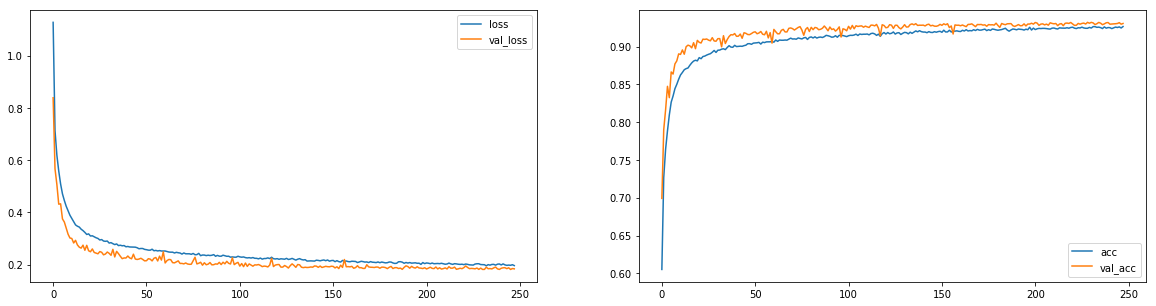

Epoch 00248: val_acc did not improve
48000/48000 [==============================] - 178s 4ms/step - loss: 0.1961 - acc: 0.9266 - val_loss: 0.1837 - val_acc: 0.9307
Epoch 249/500
26112/48000 [===============>..............] - ETA: 1:05 - loss: 0.1926 - acc: 0.9281

In [ ]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint 
from fnn_helper import PlotLosses

adam = optimizers.Adam(lr=0.001, decay=0.00001) #decay=1e-4
model = get_model_5()
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn-6.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=256, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )